In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations

In [9]:
tickers = ['ABBV','CB']
timeframe = '5y'
start_cash = 10,000
window = 200

In [10]:
df=yf.download(tickers, period=timeframe)['Close']

/var/folders/pc/lwrwx3mn1jq97mrd103w8tm80000gn/T/ipykernel_39457/896026501.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(tickers, period=timeframe)['Close']
[*********************100%***********************]  2 of 2 completed


In [11]:
def lin_reg(df,tickers,window):
    slope_col = [np.nan] * window
    intercept_col = [np.nan] * window
    for i in range(window, len(df)):
        data = df.iloc[i-window:i]
        stock1 = data[tickers[0]].values
        stock2 = data[tickers[1]].values
        stock1 = sm.add_constant(stock1)
        model = sm.OLS(stock2,stock1).fit()
        slope_col.append(model.params[1])
        intercept_col.append(model.params[0])
    return pd.DataFrame({'Slope': slope_col, 'Intercept': intercept_col}, index=df.index)

In [12]:
def calc_spread(df,tickers,window):
    spread = df[tickers[1]] - (df['Intercept'] + df['Slope']*df[tickers[0]])
    spread_mean = spread.rolling(window).mean()
    spread_std = spread.rolling(window).std()
    z_score = (spread - spread_mean)/spread_std
    return pd.DataFrame({'Spread': spread, 'Spread Mean': spread_mean, 'Spread Std': spread_std, 'Z-Score': z_score})

In [13]:
df[['Slope','Intercept']] = lin_reg(df,tickers,window)[['Slope','Intercept']]
spread_data = calc_spread(df, tickers, window)
df[spread_data.columns] = spread_data

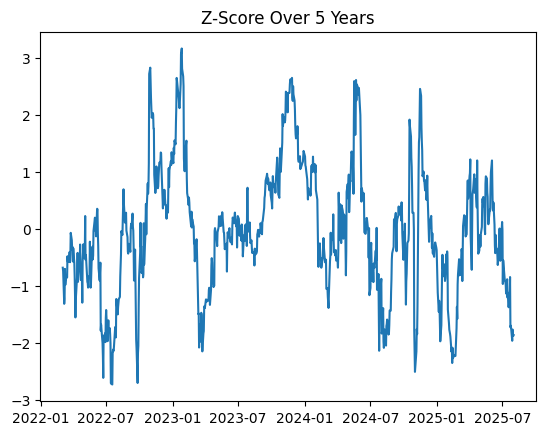

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Z-Score Over 5 Years')
ax.plot(df['Z-Score'])


In [16]:
df.iloc[395:405]

Ticker,ABBV,CB,Slope,Intercept,Spread,Spread Mean,Spread Std,Z-Score
Date,,,,,,,,
2022-02-25,131.233109,197.035080,0.932493,75.836804,-1.175684,NaN,NaN,NaN
2022-02-28,129.679794,193.818115,0.927569,76.401462,-2.870329,NaN,NaN,NaN
2022-03-01,129.609619,189.915878,0.922082,77.005681,-6.600457,NaN,NaN,NaN
2022-03-02,131.259445,194.446274,0.912793,77.980826,-3.347209,NaN,NaN,NaN
2022-03-03,131.996613,196.064285,0.906755,78.644868,-2.269138,4.071188,9.297191,-0.681962
2022-03-04,132.128265,195.607452,0.901523,79.245197,-2.754446,4.104148,9.260999,-0.740589
2022-03-07,131.154144,189.325760,0.895524,79.918131,-8.044065,4.119933,9.237443,-1.316814
2022-03-08,129.135696,188.117020,0.884579,81.088425,-7.202133,4.127950,9.226859,-1.227946
2022-03-09,130.618805,194.103668,0.875105,82.104436,-2.305946,4.158070,9.195767,-0.702934
